# Week 2 Assignment
## data exploration
Xander Lee

UP221-W24

21 Jan 2024

In [1]:
#importing python libraries
import pandas as pd
import geopandas as gpd


## 1. reading in the data
here I read the file and display it to get basic info about the dataframe. 

In [5]:
#reading in file
pantries = gpd.read_file('Data/Food_Pantries_Calculations_b.csv')
pantries

,geoid,geoid20,year,pantry_count,geometry
0,1400000US06037104103,6037104103,2020,1,None
1,1400000US06037104201,6037104201,2020,1,None
2,1400000US06037104822,6037104822,2020,1,None
3,1400000US06037106646,6037106646,2020,1,None
4,1400000US06037111402,6037111402,2020,1,None
...,...,...,...,...,...
2490,1400000US06037980035,6037980035,2020,0,None
2491,1400000US06037980036,6037980036,2020,0,None
2492,1400000US06037980037,6037980037,2020,0,None
2493,1400000US06037980038,6037980038,2020,0,None


We can see that there are 2495 unique values in the dataset and 5 columns of variables: geoid, geodid20, year, pantry count, and geometry. Displaying the pantries dataset also shows me the head and tail of the dataset. The year variable is somewhat confusing since it seems like all of the values are identical. maybe not the most meticulously constructed dataset around. It also appears that the 'geometry' column is null for all values, which is curious, since the methodology notes in the release information for this dataset indicates that there are unique geocoded coordinates for each value. It would seem that the geoid and geoid20 may be the x and y coordinates, but I don't know how to operationalize/utilize that.

next I confirm that the dataframe contains geodata. 

In [7]:
#confirming we have geographic data
type(pantries)

geopandas.geodataframe.GeoDataFrame

In [8]:
#display dataframe info
pantries.info

<bound method DataFrame.info of                      geoid     geoid20  year pantry_count geometry
0     1400000US06037104103  6037104103  2020            1     None
1     1400000US06037104201  6037104201  2020            1     None
2     1400000US06037104822  6037104822  2020            1     None
3     1400000US06037106646  6037106646  2020            1     None
4     1400000US06037111402  6037111402  2020            1     None
...                    ...         ...   ...          ...      ...
2490  1400000US06037980035  6037980035  2020            0     None
2491  1400000US06037980036  6037980036  2020            0     None
2492  1400000US06037980037  6037980037  2020            0     None
2493  1400000US06037980038  6037980038  2020            0     None
2494  1400000US06037980039  6037980039  2020            0     None

[2495 rows x 5 columns]>

Displaying dataset info confirms we have 2,495 rows, 5 columns, and the previously mentioned 5 columns. Below, querying the shape of the dataset further confirms our 2,495 rows and 5 columns. 

In [16]:
#rows/columns? 
pantries.shape

(2495, 5)

In [17]:
#display columns
pantries.columns.to_list()

['geoid', 'geoid20', 'year', 'pantry_count', 'geometry']

the 5 columns are 'geoid', 'geoid20', 'year', 'pantry_count', and 'geometry'


In [20]:
#saving a year count as a new variable
year_count = pantries['year'].value_counts()
year_count

year
2020    2495
Name: count, dtype: int64

As I suspected, all 2,495 food pantries in this dataset are labelled 2020, which I think is the year this dataset was compiled? perhaps this is the foundation for an ongoing longitudinal tracking of food pantries starting in the year 2020 and year is intended to reflect the sampling timeframe

In [23]:
#making a dataframe out of the year count variable for better plotting
year_count = year_count.reset_index()

year_count

,index,year,count
0,0,2020,2495


<Axes: title={'center': 'values per year sampled'}, xlabel='year'>

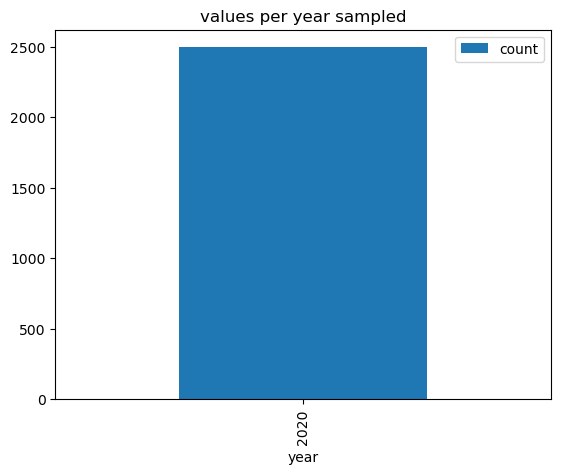

In [25]:
#plot the count
year_count.plot.bar(x = 'year', y = 'count', title = 'values per year sampled')

In [27]:
pantries.query("year == '2020'")

,geoid,geoid20,year,pantry_count,geometry
0,1400000US06037104103,6037104103,2020,1,None
1,1400000US06037104201,6037104201,2020,1,None
2,1400000US06037104822,6037104822,2020,1,None
3,1400000US06037106646,6037106646,2020,1,None
4,1400000US06037111402,6037111402,2020,1,None
...,...,...,...,...,...
2490,1400000US06037980035,6037980035,2020,0,None
2491,1400000US06037980036,6037980036,2020,0,None
2492,1400000US06037980037,6037980037,2020,0,None
2493,1400000US06037980038,6037980038,2020,0,None


filtering the data based on year further confirms that every unique entry in the dataset has an identical year value. 

In [30]:
pantries.geometry

0       None
1       None
2       None
3       None
4       None
        ... 
2490    None
2491    None
2492    None
2493    None
2494    None
Name: geometry, Length: 2495, dtype: geometry

it would appear that geopandas/I could not parse the geodata contained in this dataset. the dataset authors have chosen to give idiosyncratically geocoded x,y coordinates with no readily discernible connection to latitude or longitude, so the plotting command in geopandas will not do much, yet i will try.

<Axes: >

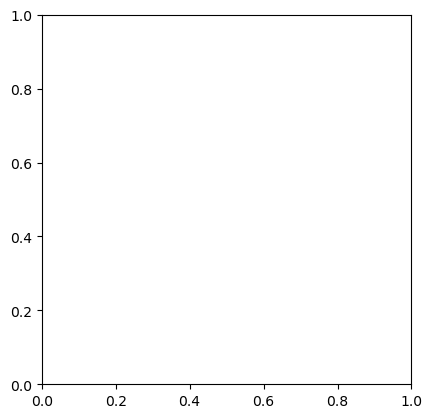

In [31]:
pantries.plot()

as I suspected, the plot did not populate correcty. Is this just a poorly constructed dataset, or do I need to do additional processing to the geometric markers before attempting to plot?